# <center>Домашнее задание № 2 (демо). <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

**Заполните код в клетках и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1y8qj5iYpaVhczjWnZuHd5NRR_sdCGy3eTF5n-qPKknQ).**

In [0]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
#mpl.rc("figure", figsize=(20, 12))

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs).

In [0]:
df = pd.read_csv('howpop_train.csv')

In [27]:
df.shape

(134137, 17)

In [28]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [0]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [31]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/company/piter/blog/280023/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [0]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("YlGnBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [33]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [0]:
df['year'] = df.published.apply(lambda ts: ts.year)
df['month'] = df.published.apply(lambda ts: ts.month)
df['day'] = df.published.apply(lambda ts: ts.day)
df['dayofweek'] = df.published.apply(lambda ts: ts.isoweekday())
df['hour'] = df.published.apply(lambda ts: ts.hour)

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* **март 2015**
* апрель 2015
* апрель 2016

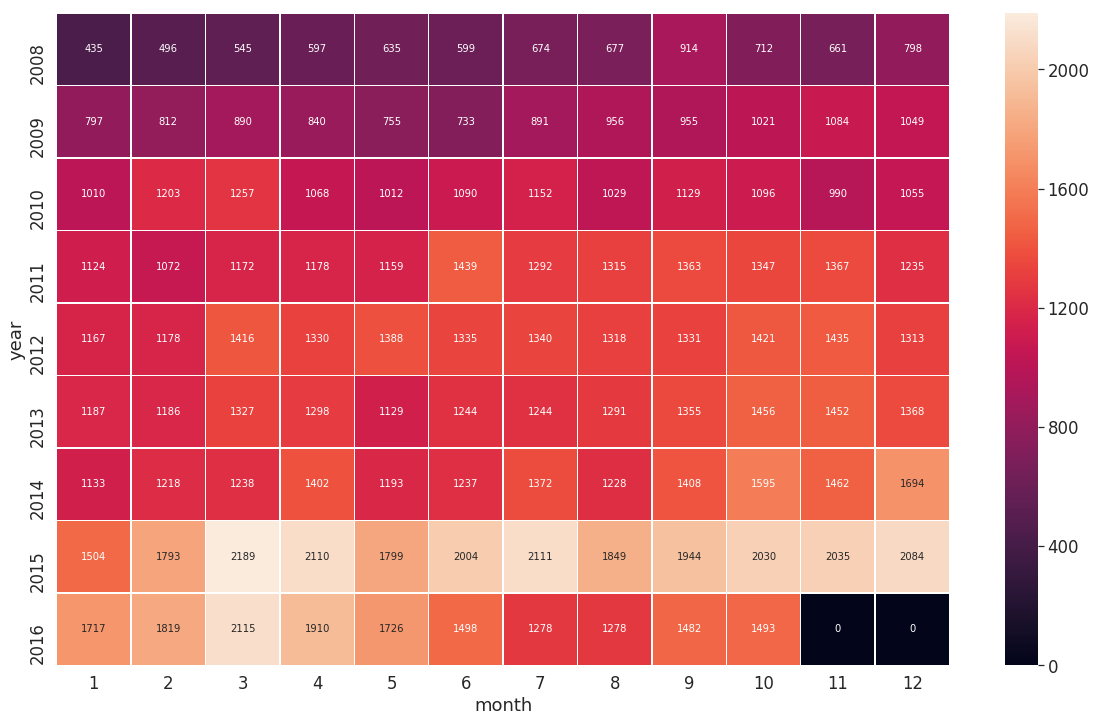

In [41]:
year_month_df = df.pivot_table(
    index='year',
    columns='month',
    values='url',
    aggfunc='count').fillna(0)

sns.heatmap(year_month_df, annot=True, linewidths=.5, fmt=".0f")

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* **На хабре _всегда_ больше статей, чем на гиктаймсе**
* **По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей**

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

In [43]:
special_df = df[(df['year']==2015)&(df['month']==3)]

domain_day_df = special_df.pivot_table(
    index='domain',
    columns='dayofweek',
    values='url',
    aggfunc='count')
domain_day_df

dayofweek,1,2,3,4,5,6,7
domain,,,,,,,
geektimes.ru,129,170,124,116,107,57,52
habrahabr.ru,267,327,238,232,208,58,104


## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* **Больше всего просмотров набирают статьи, опубликованные в 6 часов утра**
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

In [48]:
df.groupby('hour')[['views']].mean().sort_values('views', ascending=False).head()

,views
hour,
6,21354.310115
4,20678.389091
7,19093.953408
3,18370.017972
22,18365.387460


In [49]:
df.groupby('hour')[['comments']].mean().sort_values('comments', ascending = False).head()

,comments
hour,
4,53.657273
3,53.123877
6,51.799618
1,49.417910
2,48.827025


In [50]:
df[df.domain == 'geektimes.ru'].sort_values('comments', ascending=False).head(1)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,dayofmonth,hour,day
38763,https://geektimes.ru/post/123157/,geektimes.ru,123157,2011-07-01 02:35:00,@Dottore,NaN,False,2158,Как раздавать инвайты на Google+,2266,24,15300,226.0,55.0,2011,7,5,1,2,1


In [0]:
df[df.domain == 'habrahabr.ru'].groupby('hour')[['comments']].mean().plot();

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* **@Mithgol**
* @alizar
* @ilya42

In [57]:
df[df.author.isin([
    '@Mordatyj', '@Mithgol', 
    '@alizar', '@ilya42'])].groupby('author')[['votes_minus']]\
    .mean().sort_values('votes_minus', ascending = False)

,votes_minus
author,
@Mithgol,20.481081
@alizar,7.928191
@Mordatyj,7.471455
@ilya42,6.216797


## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?
Nope

In [0]:
tmp_df = df.pivot_table(index='hour', values='title', aggfunc='count', columns='dayofweek')

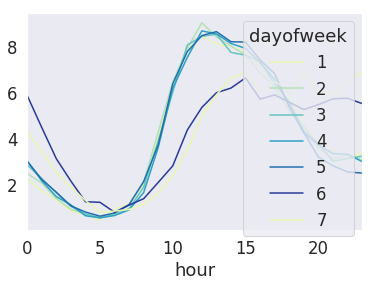

In [59]:
tmp_df.apply(lambda x: 100. * x / tmp_df.sum(), axis = 1).plot();